In [1]:
from pandas import DataFrame, Grouper
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import sys

In [2]:
%%time
# import our own stuff
sys.path.append("../python/src")

from tools import read_water_data, extract_features, apply_historical_incomegroups_wb
from tools import get_oecd_iso3_code_mapping,apply_historical_incomegroups_oecd

from waterData import default_features

CPU times: user 79.2 ms, sys: 1.95 ms, total: 81.1 ms
Wall time: 81 ms


In [3]:
%%time
# set some options
#pd.set_option('display.max_rows', 600)
#pd.set_option('display.max_columns', 600)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)

datadir = "../data/"
cachedir = "../data/cache" 

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 2.38 µs


In [4]:
%%time

# read some data and get some mapping that may needs calculations

# the codemapping is generate over the full dataset to get all oecd-country-codes
# and from a fetch of the countries known to worldbank
codemapping = get_oecd_iso3_code_mapping(cachedir=cachedir,datadir=datadir)

# the data from oecd must be downloaded and saved as zips in the data-dir, check readme for links
oecddf = read_water_data(setname="fullset",datadir=datadir,cachedir=cachedir)


display("all data")
# tell me what it is
oecddf.describe()

Reading countrycode-mapping cached file: ../data/cache/oecdiso3.p
Reading Datafrom cached file: ../data/cache/fullset.p


'all data'

CPU times: user 11.1 s, sys: 3.69 s, total: 14.8 s
Wall time: 14.8 s


,USD_Commitment,USD_Disbursement,USD_Received,USD_Commitment_Defl,USD_Disbursement_Defl,USD_Received_Defl,USD_Adjustment,USD_Adjustment_Defl,USD_AmountUntied,USD_AmountPartialTied,...,TypeRepayment,NumberRepayment,Interest2,USD_Interest,USD_Outstanding,USD_Arrears_Principal,USD_Arrears_Interest,CapitalExpend,PSIflag,PSIAddType
count,3.275182e+06,3.762420e+06,2.075152e+06,3.275072e+06,3.762156e+06,2.075140e+06,60032.000000,60032.000000,1.899677e+06,1.006533e+06,...,549171.000000,564867.000000,333850.000000,1.110691e+06,881558.000000,646025.000000,651855.000000,32902.000000,3301.000000,1218.000000
mean,1.700388e+00,9.906404e-01,4.688217e-01,2.046867e+00,1.047619e+00,5.014058e-01,-0.748338,-0.839550,9.199535e-01,2.892181e-01,...,1.472700,1.854219,394.025889,1.291592e-01,6.420891,0.147550,0.218216,0.000088,1.987882,2.369458
std,2.020509e+01,1.468442e+01,7.989517e+00,2.368979e+01,1.543262e+01,8.453970e+00,11.821947,11.727234,1.252183e+01,4.405014e+00,...,1.179965,0.573195,588.434494,2.429448e+00,55.744203,2.134346,2.654434,0.001916,0.109427,0.919855
min,-1.421530e+03,-2.258730e+02,-5.030000e-01,-1.300270e+03,-2.461000e+02,-6.852520e-01,-1995.000000,-1870.620000,-1.421530e+03,-1.787180e+00,...,0.000000,0.000000,-820.000000,-3.491230e+01,-0.507119,-3.033060,-0.149653,0.000000,1.000000,1.000000
25%,0.000000e+00,3.647640e-03,0.000000e+00,0.000000e+00,3.775977e-03,0.000000e+00,-0.080000,-0.083995,0.000000e+00,0.000000e+00,...,1.000000,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
50%,2.121690e-02,4.067340e-02,0.000000e+00,2.279000e-02,4.295905e-02,-0.000000e+00,-0.009426,-0.009881,4.364590e-03,0.000000e+00,...,1.000000,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000
75%,1.973465e-01,2.353720e-01,-0.000000e+00,2.188643e-01,2.491832e-01,-0.000000e+00,-0.000870,-0.000894,1.250000e-01,0.000000e+00,...,1.000000,2.000000,750.000000,2.581010e-02,0.848039,0.000000,0.000000,0.000000,2.000000,3.000000
max,6.585080e+03,7.188450e+03,3.690330e+03,7.209450e+03,7.209450e+03,3.637680e+03,0.004700,0.004720,4.087360e+03,8.751230e+02,...,5.000000,52.000000,20000.000000,1.460130e+03,24053.000000,276.494000,900.342000,0.100000,2.000000,3.000000


In [5]:
oecddf.columns

Index(['Year', 'DonorCode', 'DonorName', 'AgencyCode', 'AgencyName', 'CrsID',
       'ProjectNumber', 'InitialReport', 'RecipientCode', 'RecipientName',
       'RegionCode', 'RegionName', 'IncomegroupCode', 'IncomegroupName',
       'FlowCode', 'FlowName', 'Bi_Multi', 'Category', 'Finance_t', 'Aid_t',
       'USD_Commitment', 'USD_Disbursement', 'USD_Received',
       'USD_Commitment_Defl', 'USD_Disbursement_Defl', 'USD_Received_Defl',
       'USD_Adjustment', 'USD_Adjustment_Defl', 'USD_AmountUntied',
       'USD_AmountPartialTied', 'USD_AmountTied', 'USD_AmountUntied_Defl',
       'USD_AmountPartialTied_Defl', 'USD_Amounttied_Defl', 'USD_IRTC',
       'USD_Expert_Commitment', 'USD_Expert_Extended', 'USD_Export_Credit',
       'CurrencyCode', 'Commitment_National', 'Disbursement_National',
       'GrantEquiv', 'USD_GrantEquiv', 'ShortDescription', 'ProjectTitle',
       'PurposeCode', 'PurposeName', 'SectorCode', 'SectorName', 'ChannelCode',
       'ChannelName', 'ChannelReportedName'

In [6]:
oecddf['CrsID'].describe()

count         4355298
unique        1568275
top       2005008000z
freq              158
Name: CrsID, dtype: object

In [7]:
oecddf['ProjectNumber'].describe()

count     3517981
unique    1451239
top          n.a.
freq         9833
Name: ProjectNumber, dtype: object

In [8]:
oecddf['InitialReport'].describe()

count     4354990
unique          5
top             3
freq      2138048
Name: InitialReport, dtype: object

In [9]:
# set some options
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 600)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

tmp = oecddf[oecddf['CrsID'] == '2005008000z']
tmp.T

,187350,187365,188139,188150,188803,189536,189568,190848,190854,191182,191204,191959,192365,192368,192427,192600,192673,192678,193951,193959,194107,195555,195584,196309,197309,197328,197864,198678,198686,198706,200099,200948,202048,202083,202751,203382,203474,203643,205494,206315,206316,207865,208124,208219,208837,209171,209616,210113,210436,211359,211799,213002,213051,213564,213567,214490,214961,214962,216531,217444,217445,218363,218746,219096,220387,221246,221247,221681,222182,222969,223041,223944,225075,225113,225118,226363,226371,227049,228960,228963,229015,231264,233006,233158,233267,233925,234008,236983,238977,239210,239369,239963,241218,241490,241857,242035,242075,243129,243137,243968,244706,245018,246260,246284,247235,247250,248386,248387,249412,250585,252501,253050,254713,255012,255152,256277,257426,258598,258600,259126,259131,259329,259458,259605,259650,260113,260119,260283,260645,261310,261394,261538,261848,262655,262986,263754,264673,266598,266601,269336,269809,270601,272143,273278,274475,274516,277246,277250,280419,280422,281032,281665,282552,285102,288324,295345,299964,300510
Year,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005
DonorCode,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,50,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
DonorName,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Spain,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Germany,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria
AgencyCode,9,6,9,10,6,9,6,9,12,9,6,12,6,9,2,9,6,2,12,9,6,9,6,9,16,9,6,12,9,6,6,9,9,6,6,12,12,9,9,6,9,6,12,9,9,6,9,12,9,6,12,9,6,6,12,9,9,12,6,12,9,6,12,6,9,6,9,12,6,9,6,6,9,12,6,9,6,6,12,9,6,6,9,6,6,12,6,6,9,9,12,6,12,6,9,9,12,9,6,9,6,12,9,6,9,12,12,6,6,9,6,9,9,12,6,6,6,9,12,9,6,2,9,2,12,12,9,9,9,9,9,9,12,9,6,9,6,9,6,6,12,6,6,9,9,6,12,9,9,6,12,6,6,9,6,10,2,6
AgencyName,"FM of Education, Science and Research","Provincial governments, local communities","FM of Education, Science and Research",FM 

In [10]:
%%time

# filter out useless / unrelevant data
df = oecddf[oecddf['USD_Commitment'] != 0.0].copy()

df = df[df['USD_Commitment'].notnull()]

df = df[df['FlowCode'].isin(['13','11'])]

#df = df[df['RecipientCode'].isin(codemapping)]

df = df[df['CommitmentDate'] > datetime(year=1995,month=12,day=31)]
df = df[df['CommitmentDate'] < datetime(year=2019,month=1,day=1)]

# reduce to relevant features
df = extract_features(df,features=default_features)

# tell me what is left
df.describe()

CPU times: user 6.43 s, sys: 1.66 s, total: 8.09 s
Wall time: 8.1 s


,USD_Commitment_Defl,USD_Received_Defl,USD_GrantEquiv,USD_Disbursement_Defl
count,1.448112e+06,511650.000000,365285.000000,1.190567e+06
mean,1.818983e+00,0.008468,0.836445,8.537736e-01
std,2.027154e+01,0.576523,21.660811,1.715058e+01
min,-1.094320e+03,0.000000,-44.771200,-1.565590e+01
25%,1.575987e-02,0.000000,0.009718,8.540510e-03
50%,7.803370e-02,0.000000,0.044498,4.409820e-02
75%,4.050145e-01,-0.000000,0.204578,2.012665e-01
max,7.209450e+03,155.161000,6585.080000,7.209450e+03


In [11]:
%%time

df = apply_historical_incomegroups_oecd(df,datadir=datadir)

CPU times: user 5.36 s, sys: 447 ms, total: 5.81 s
Wall time: 5.82 s


In [12]:
%%time

df = apply_historical_incomegroups_wb(df,codemapping,datadir=datadir)

CPU times: user 6.29 s, sys: 686 ms, total: 6.98 s
Wall time: 6.99 s


CPU times: user 3.56 s, sys: 656 ms, total: 4.21 s
Wall time: 4.23 s


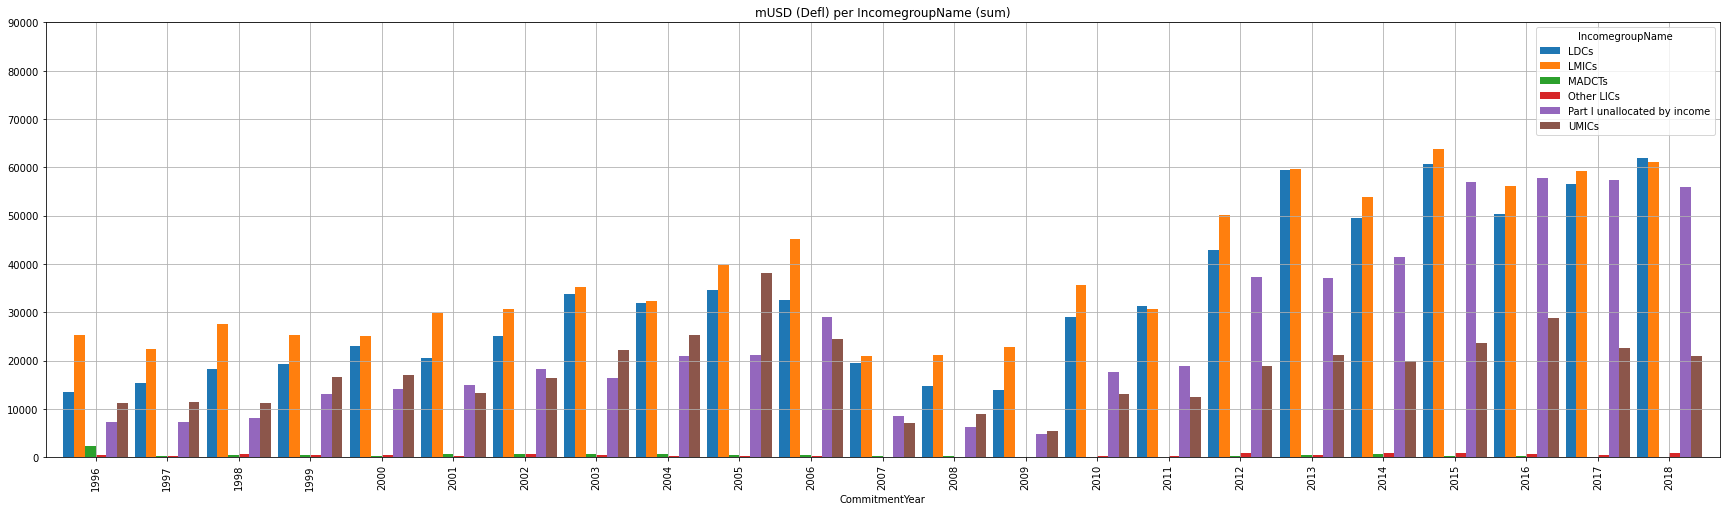

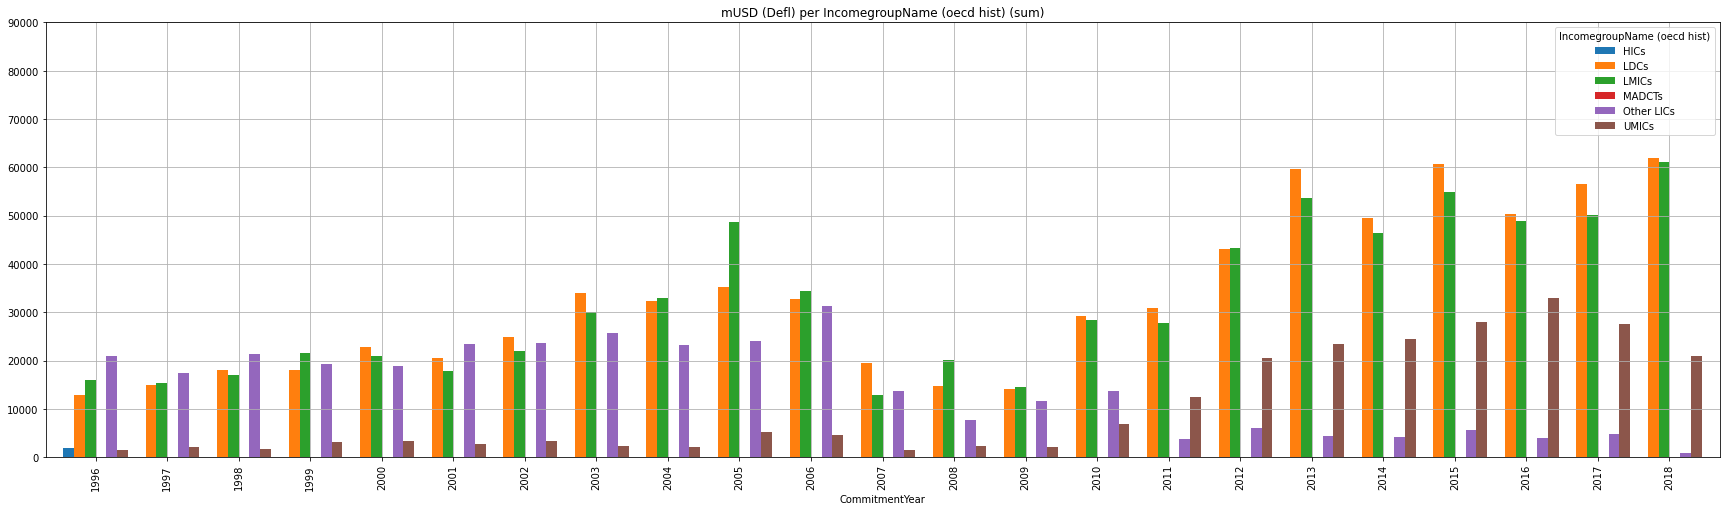

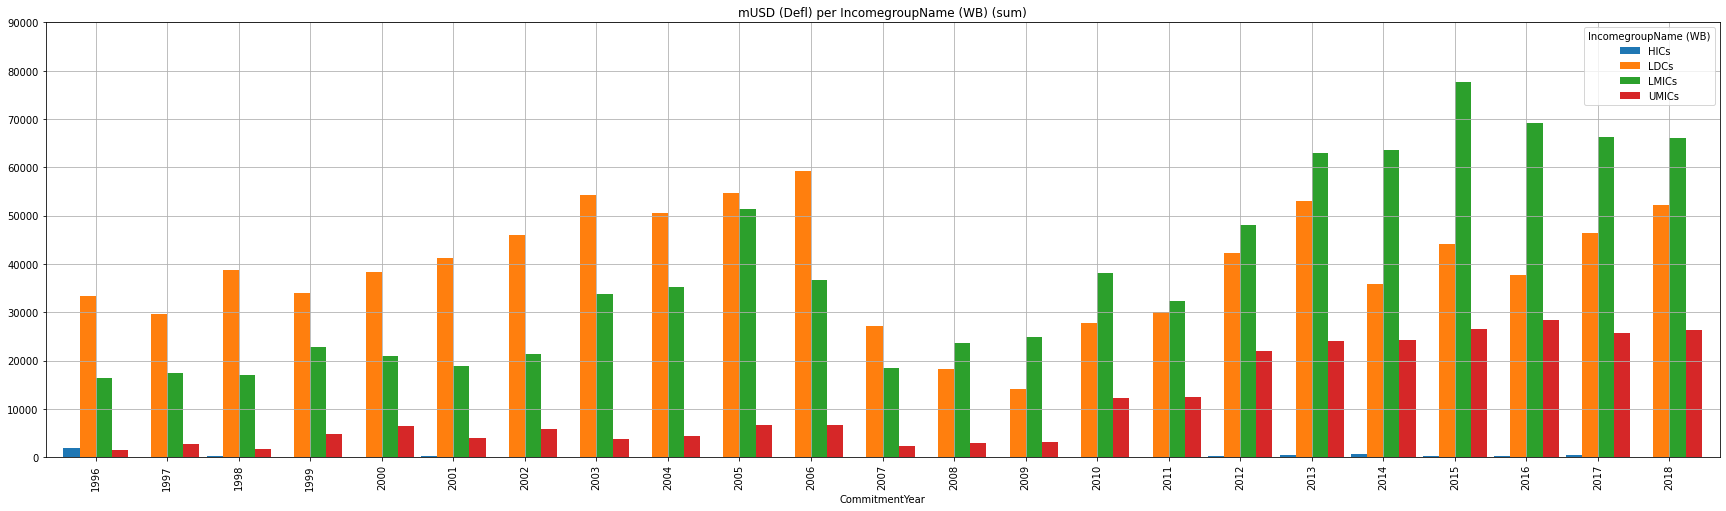

In [13]:
%%time

for igclassname in ["IncomegroupName","IncomegroupName (oecd hist)","IncomegroupName (WB)"]:

    groupeddf= df[df['CommitmentDate'] > datetime(year=1995,month=12,day=31)].set_index("CommitmentDate")
    #if igclassname != "IncomegroupName":
    #    groupeddf[igclassname].fillna( groupeddf['IncomegroupName'] + " (copy)",inplace=True)
    groupeddf = groupeddf.groupby([Grouper(freq="A"), igclassname])['USD_Commitment_Defl']

    # resolve grouping, unstack, fill missing and reset_index()
    groupeddf = groupeddf.sum().unstack().fillna(0.0).reset_index()

    # an absolut view
    # create index on year as string and drop old index
    groupeddf["CommitmentYear"]=groupeddf["CommitmentDate"].apply(lambda x: str(x.year))
    groupeddf = groupeddf.drop(columns=["CommitmentDate"]).set_index("CommitmentYear")

    # plot absolut sum
    groupeddf.plot(width=0.9,grid=True,kind='bar',
                   title="mUSD (Defl) per %s (sum)" %(igclassname),
                   figsize=(30,8),ylim=(0, 90000)
                   #color={"LDCs": "blue", "LMICs": "orange", "UMICs": "green","Other LICs": "black","MADCTs": "black"}
            )
    